### Importación de datos



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
tiendas_precio = [tienda['Precio'], tienda2['Precio'], tienda3['Precio'], tienda4['Precio']]

facturacion = [sum(precio) for precio in tiendas_precio]

dic_facturacion = {'Tienda': tiendas, 'Facturacion': facturacion}
resumen_facturación = pd.DataFrame(dic_facturacion)

resumen_facturación

,Tienda,Facturacion
0,Tienda 1,1.150880e+09
1,Tienda 2,1.116344e+09
2,Tienda 3,1.098020e+09
3,Tienda 4,1.038376e+09


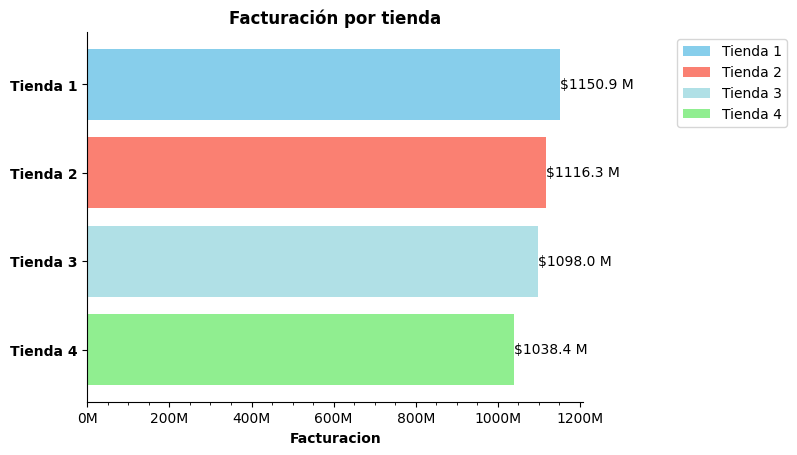

In [ ]:
posiciones = [i for i in range(len(tiendas))]
colores_barras = ['skyblue','salmon', 'powderblue', 'lightgreen']

def formato_func(value, tick_number):
    return f'{int(value / 1000000)}M'

fig, ax = plt.subplots()

hbars = ax.barh(posiciones, facturacion, align='center', color=colores_barras, label=tiendas)

ax.xaxis.set_major_formatter(formato_func)
ax.xaxis.set_minor_locator(AutoMinorLocator())

ax.set_title('Facturación por tienda', fontweight='bold')
ax.set_xlabel('Facturacion($)', fontweight='bold')
ax.set_yticks(posiciones, labels=tiendas,  fontweight='bold')
ax.invert_yaxis()

ax.bar_label(hbars, fmt= lambda x: f'${x / 1000000:.1f} M')
ax.spines[['top', 'right']].set_visible(False)
ax.legend(loc='upper center', bbox_to_anchor=(1.3,1), ncols=1)

plt.show()

# 2. Ventas por categoría

In [ ]:
def ventas_categorias(df):
  _ventas_categorias = df.groupby(['Categoría del Producto'])['Producto'].count().to_frame('Ventas')

  return _ventas_categorias.sort_values(by='Ventas', ascending=False).reset_index()

categorias1 = ventas_categorias(tienda)
categorias2 = ventas_categorias(tienda2)
categorias3 = ventas_categorias(tienda3)
categorias4 = ventas_categorias(tienda4)


In [ ]:
def ranking_categorias(df):
  df['Ranking'] = df['Ventas'].rank(method='min', ascending=False)

  return df.sort_values(by='Ranking')

ventas_categorias1 = ranking_categorias(categorias1)
ventas_categorias2 = ranking_categorias(categorias2)
ventas_categorias3 = ranking_categorias(categorias3)
ventas_categorias4 = ranking_categorias(categorias4)


In [ ]:
_categorias1 = ventas_categorias1[ventas_categorias1['Ranking'] <= 5]
_categorias2 = ventas_categorias2[ventas_categorias2['Ranking'] <= 5]
_categorias3 = ventas_categorias3[ventas_categorias2['Ranking'] <= 5]
_categorias4 = ventas_categorias4[ventas_categorias2['Ranking'] <= 5]

_categorias4


,Categoría del Producto,Ventas,Ranking
0,Muebles,480,1.0
1,Electrónicos,451,2.0
2,Juguetes,338,3.0
3,Deportes y diversión,277,4.0
4,Electrodomésticos,254,5.0


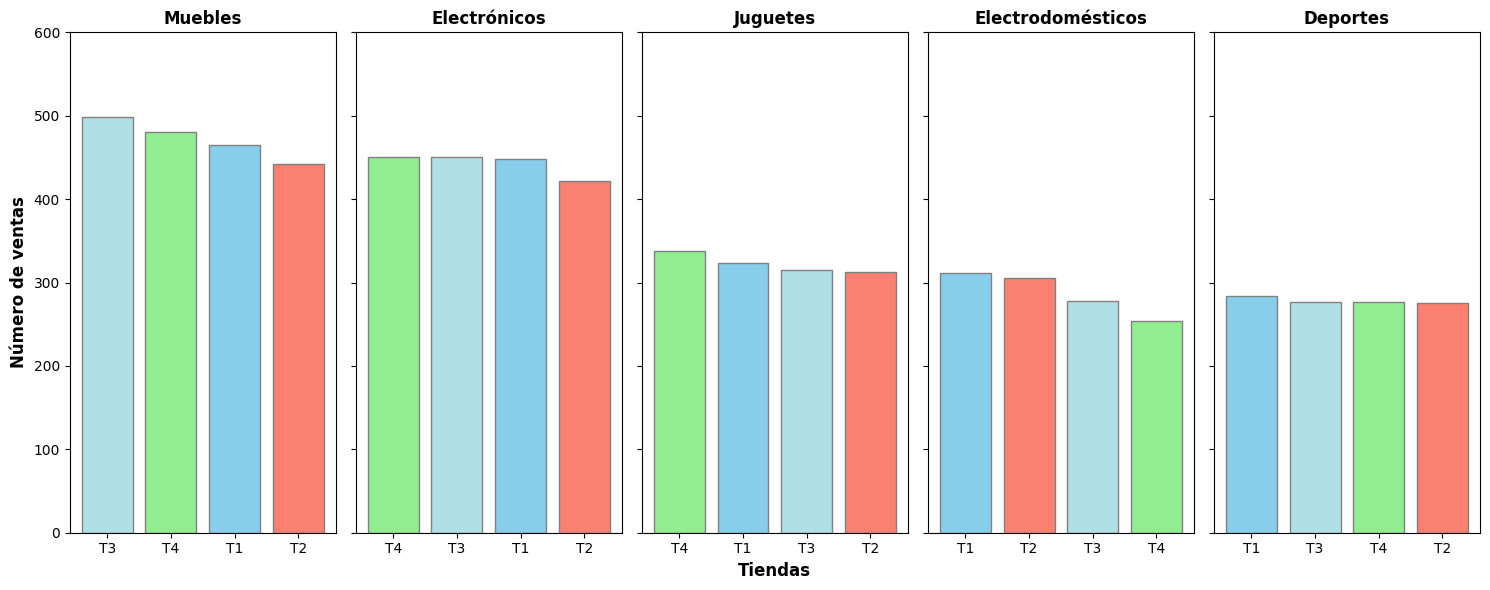

In [ ]:
etiquetas_tiendas = ['T1', 'T2', 'T3', 'T4']

categoria_muebles = {
    'Tiendas': etiquetas_tiendas,
    'Ventas': [_categorias1.iat[0, 1], _categorias2.iat[0, 1], _categorias3.iat[0, 1], _categorias4.iat[0, 1]]
}
categoria_electronicos = {
    'Tiendas': etiquetas_tiendas,
    'Ventas': [_categorias1.iat[1, 1], _categorias2.iat[1, 1], _categorias3.iat[1, 1], _categorias4.iat[1, 1]]
}
categoria_juguetes = {
    'Tiendas': etiquetas_tiendas,
    'Ventas': [_categorias1.iat[2, 1], _categorias2.iat[2, 1], _categorias3.iat[2, 1], _categorias4.iat[2, 1]]
}
categoria_electrodomesticos = {
    'Tiendas': etiquetas_tiendas,
    'Ventas': [_categorias1.iat[3, 1], _categorias2.iat[3, 1], _categorias3.iat[3, 1], _categorias4.iat[4, 1]]
}
categoria_deportes = {
    'Tiendas': etiquetas_tiendas,
    'Ventas': [_categorias1.iat[4, 1], _categorias2.iat[4, 1], _categorias3.iat[4, 1], _categorias4.iat[3, 1]]
}

categoria_muebles = pd.DataFrame(categoria_muebles).sort_values(by='Ventas', ascending=False)
categoria_electronicos = pd.DataFrame(categoria_electronicos).sort_values(by='Ventas', ascending=False)
categoria_juguetes = pd.DataFrame(categoria_juguetes).sort_values(by='Ventas', ascending=False)
categoria_electrodomesticos = pd.DataFrame(categoria_electrodomesticos).sort_values(by='Ventas', ascending=False)
categoria_deportes = pd.DataFrame(categoria_deportes).sort_values(by='Ventas', ascending=False)

dataframes_categorias = {
    'Muebles': categoria_muebles,
    'Electrónicos': categoria_electronicos,
    'Juguetes': categoria_juguetes,
    'Electrodomésticos': categoria_electrodomesticos,
    'Deportes': categoria_deportes
}

color_map = {'T1': 'skyblue', 'T2': 'salmon', 'T3': 'powderblue', 'T4': 'lightgreen'}

fig, axes = plt.subplots(1, len(dataframes_categorias), figsize=(15, 6), sharey=True)

axes = axes.flatten()

for i, (categoria, df_categoria) in enumerate(dataframes_categorias.items()):
    colores_barras = [color_map[tienda] for tienda in df_categoria['Tiendas']]
    bars = axes[i].bar(df_categoria['Tiendas'], df_categoria['Ventas'], color=colores_barras, edgecolor='grey', label=df_categoria['Tiendas'])
    axes[i].set_ylim(0, 600)
    axes[i].set_title(categoria, fontweight='bold')
    axes[i].tick_params(axis='x', rotation=0)

axes[0].set_ylabel('Número de ventas', fontweight='bold', fontsize=12)
axes[2].set_xlabel('Tiendas', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


In [ ]:
tiendas_calificacion = [tienda['Calificación'], tienda2['Calificación'], tienda3['Calificación'], tienda4['Calificación']]

calificacion = [round(sum(calificacion) / len(calificacion),2) for calificacion in tiendas_calificacion]

dic_calificacion = {'Tiendas': tiendas, 'Calificación': calificacion}
resumen_calificacion = pd.DataFrame(dic_calificacion)

resumen_calificacion.sort_values('Calificación')

,Tiendas,Calificación
0,Tienda 1,3.98
3,Tienda 4,4.00
1,Tienda 2,4.04
2,Tienda 3,4.05


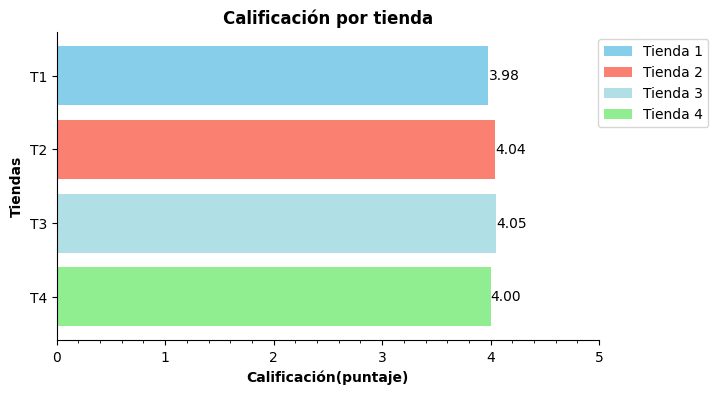

In [ ]:
color_map = {'Tienda 1': 'skyblue', 'Tienda 2': 'salmon', 'Tienda 3': 'powderblue', 'Tienda 4': 'lightgreen'}
posiciones = [i for i in range(len(tiendas))]

fig, ax = plt.subplots(figsize=(7,4))

hbars = ax.barh(posiciones, calificacion, align='center', color=[color_map[tienda] for tienda in resumen_calificacion['Tiendas']  ], label=tiendas)
ax.set_yticks(posiciones, labels=etiquetas_tiendas)
ax.set_xlim(0,5)
ax.invert_yaxis()

ax.xaxis.set_minor_locator(AutoMinorLocator())

ax.set_xlabel('Calificación(puntaje)', fontweight='bold')
ax.set_ylabel('Tiendas', fontweight='bold')
ax.set_title('Calificación por tienda', fontweight='bold')

ax.bar_label(hbars, fmt='%.2f')
ax.spines[['top', 'right']].set_visible(False)
ax.legend(loc='upper center', bbox_to_anchor=(1.1,1), ncols=1)

plt.show()

# 4. Productos más y menos vendidos

In [ ]:
def productos_mas_vendidos(df, ranking):
  _productos = df.groupby(['Producto', 'Categoría del Producto'])['Producto'].count().to_frame('Ventas')

  _productos['Ranking'] = _productos.rank(method='min', ascending=False)

  _productos = _productos.sort_values(by='Ranking')

  return _productos[_productos['Ranking'] <= ranking]



In [ ]:
def productos_menos_vendidos(df, ranking):
  _productos = df.groupby(['Producto','Categoría del Producto'])['Producto'].count().to_frame('Ventas')

  _productos['Ranking'] = _productos.rank(method='min', ascending=True)

  _productos = _productos.sort_values(by='Ranking')

  return _productos[_productos['Ranking'] <=ranking]


In [ ]:
mas_vendidos = productos_mas_vendidos(tienda, 5)
mas_vendidos2 = productos_mas_vendidos(tienda2, 5)
mas_vendidos3 = productos_mas_vendidos(tienda3, 5)
mas_vendidos4 = productos_mas_vendidos(tienda4, 5)

mas_vendidos = mas_vendidos.reset_index()
mas_vendidos2 = mas_vendidos2.reset_index()
mas_vendidos3 = mas_vendidos3.reset_index()
mas_vendidos4 = mas_vendidos4.reset_index()


In [ ]:
menos_vendidos = productos_menos_vendidos(tienda, 5)
menos_vendidos2 = productos_menos_vendidos(tienda2, 5)
menos_vendidos3 = productos_menos_vendidos(tienda3, 5)
menos_vendidos4 = productos_menos_vendidos(tienda4, 5)

menos_vendidos = menos_vendidos.reset_index()
menos_vendidos2 = menos_vendidos2.reset_index()
menos_vendidos3 = menos_vendidos3.reset_index()
menos_vendidos4 = menos_vendidos4.reset_index()



In [ ]:
mas_vendidos['Grupo'] = 'Más vendidos'
menos_vendidos['Grupo'] = 'Menos vendidos'

mas_vendidos2['Grupo'] = 'Más vendidos'
menos_vendidos2['Grupo'] = 'Menos vendidos'

mas_vendidos3['Grupo'] = 'Más vendidos'
menos_vendidos3['Grupo'] = 'Menos vendidos'

mas_vendidos4['Grupo'] = 'Más vendidos'
menos_vendidos4['Grupo'] = 'Menos vendidos'

df_productos1 = pd.concat([mas_vendidos, menos_vendidos])
df_productos2 = pd.concat([mas_vendidos2, menos_vendidos2])
df_productos3 = pd.concat([mas_vendidos3, menos_vendidos3])
df_productos4 = pd.concat([mas_vendidos4, menos_vendidos4])


In [ ]:
import plotly.express as px

fig = px.treemap(df_productos1,
                 path=['Grupo', 'Categoría del Producto', 'Producto'],
                 values='Ventas',
                 color='Ventas',
                 hover_data=['Ventas'],
                 color_continuous_scale='RdBu')

fig.update_traces(root_color="lightgrey")
fig.update_layout(margin=dict(l=20, r=20, t=40, b=20), title_text='Productos Más y Menos Vendidos: Tienda 1', title_x= 0.5)
fig.show()

In [ ]:
fig = px.treemap(df_productos2,
                 path=['Grupo', 'Categoría del Producto', 'Producto'],
                 values='Ventas',
                 color='Ventas',
                 hover_data=['Ventas'],
                 color_continuous_scale='RdBu')

fig.update_layout(margin=dict(l=20, r=20, t=40, b=20), title_text='Productos Más y Menos Vendidos: Tienda 2', title_x= 0.5)
fig.show()

In [ ]:
fig = px.treemap(df_productos3,
                 path=['Grupo', 'Categoría del Producto', 'Producto'],
                 values='Ventas',
                 color='Ventas',
                 hover_data=['Ventas'],
                 color_continuous_scale='RdBu')

fig.update_layout(margin=dict(l=20, r=20, t=40, b=20), title_text='Productos Más y Menos Vendidos: Tienda 3', title_x= 0.5)
fig.show()

In [ ]:
fig = px.treemap(df_productos4,
                 path=['Grupo', 'Categoría del Producto', 'Producto'],
                 values='Ventas',
                 color='Ventas',
                 hover_data=['Ventas'],
                 color_continuous_scale='RdBu')

fig.update_layout(margin=dict(l=20, r=20, t=40, b=20), title_text='Productos Más y Menos Vendidos: Tienda 4', title_x= 0.5)
fig.show()

In [ ]:
precio_promedio_productos = tienda.groupby('Categoría del Producto')['Precio'].mean().sort_values(ascending=False)

precio_promedio_productos

,Precio
Categoría del Producto,
Electrodomésticos,1.165658e+06
Electrónicos,9.586908e+05
Instrumentos musicales,5.016429e+05
Muebles,4.035133e+05
Deportes y diversión,1.383451e+05
Artículos para el hogar,7.425965e+04
Juguetes,5.554228e+04
Libros,5.077977e+04


# 5. Envío promedio por tienda

In [ ]:
costo_tienda1 = round(tienda['Costo de envío'].mean(), 2)
costo_tienda2 = round(tienda2['Costo de envío'].mean(), 2)
costo_tienda3 = round(tienda3['Costo de envío'].mean(), 2)
costo_tienda4 = round(tienda4['Costo de envío'].mean(), 2)

In [ ]:
tiendas_envios = [tienda['Costo de envío'], tienda2['Costo de envío'], tienda3['Costo de envío'], tienda4['Costo de envío']]

costo = [round(envio.mean(),2) for envio in tiendas_envios]

dic_costos = {'Tienda': tiendas, 'Costo de Envio': costo}
resumen_costos = pd.DataFrame(dic_costos)


calificaciones = resumen_calificacion['Calificación']
costos = resumen_costos['Costo de Envio']

diferencia = round(costos[0] - costos[3], 2)

costos

,Costo de Envio
0,26018.61
1,25216.24
2,24805.68
3,23459.46


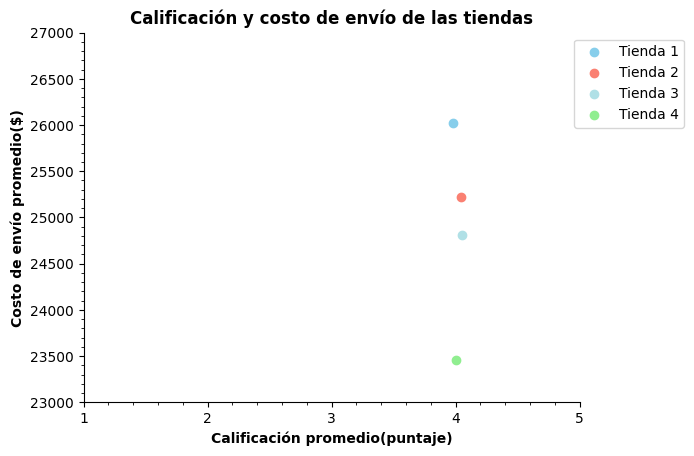

In [ ]:
colores = ['skyblue', 'salmon', 'powderblue', 'lightgreen']

fig, ax = plt.subplots()

ax.scatter(calificaciones[0], costos[0], c=colores[0], label='Tienda 1')
ax.scatter(calificaciones[1], costos[1], c=colores[1], label='Tienda 2')
ax.scatter(calificaciones[2], costos[2], c=colores[2], label='Tienda 3')
ax.scatter(calificaciones[3], costos[3], c=colores[3], label='Tienda 4')

ax.set_ylim(23000, 27000)
ax.set_xlim(1,5)

ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(AutoMinorLocator())

ax.yaxis.set_minor_locator(AutoMinorLocator())


ax.set_ylabel('Costo de envío promedio($)', fontweight='bold')
ax.set_xlabel('Calificación promedio(puntaje)', fontweight='bold')
ax.set_title('Calificación y costo de envío de las tiendas', fontweight='bold')

ax.spines[['top', 'right']].set_visible(False)
ax.legend(loc='upper center', bbox_to_anchor=(1.1,1), ncols=1)

plt.show()

#**INFORME DE TIENDAS PARA EL PERÍODO DE TIEMPO 2020-2023**







##**Introducción**
Informe sobre el análisis de datos de las tiendas del Señor Juan. El objetivo del mismo es generar el conocimiento necesario para que identificar cual es la tienda más ineficiente y que el Señor Juan pueda tomar una decisión sobre cuál de las tiendas de la cadena Alura Store debe vender. La conclusión final se basa en el análisis de las siguientes cuatro variables:
- Facturación por tienda. 💰
- Ventas por categoría por tiendas. 💻
- Productos más y menos vendidos por tienda. 🎸
- Calificación promedio de los clientes por tienda. 💟
- Costo de envío promedio por tienda. 🚘



##**Análisis de datos**

###**Análisis de facturación**

El análisis de facturación arroja que la tienda 1 fue la que tuvo mayor facturación para el perído de tiempo 2020-2023, seguido por la tienda 2 y tienda 3, mientras que la tienda 4 fue la que menor facturación obtuvo (Fig. 1)





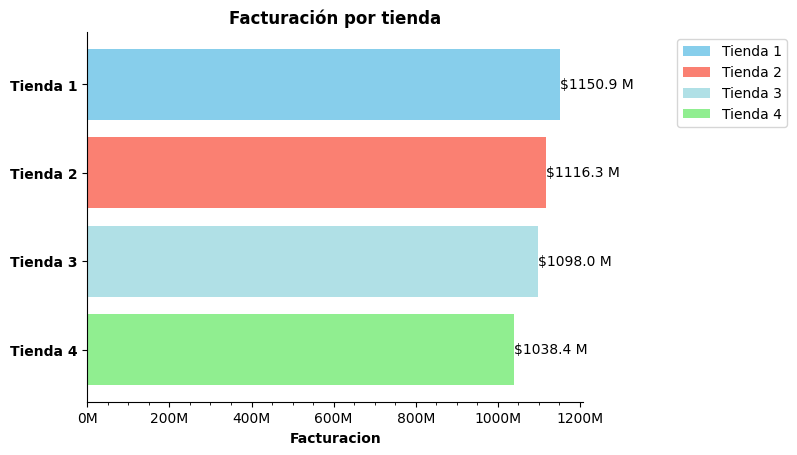

Fig. 1: Facturación de las tiendas.

###**Análisis de categorías más vendidas**

La categorías más vendidas para las cuatro tiendas son:
- Muebles
- Electrónicos
- Juguetes
- Electrodomésticos
- Deportes y Diversión

La categoría muebles ocupa el primer lugar en el número de ventas. En ella, las tiendas 3 y tienda 4 llevan la delantera  mientras que las tiendas 1 y 2 son las que venden menos muebles. Por otra parte, la categoría electrónicos fue la segunda con más ventas, siendo que las tiendas 1, 3 y 4 venden un número similar de electrónicos mientras que la tienda 2 es la única que cuyo rendimiento es menor.
El tercer lugar lo ocupa el rubro juguetes, aquí la tienda 4 es la líder de ventas seguida de cerca por la tienda 1. En cuarto lugar, en el rubro electrodomesticos se destaca la tienda 1, seguida de cerca por tienda 2, quedando atrás en ventas las tiendas 3 y 4. En el último lugar, se encuentra el rubro deportes y diversión. En la última gráfica de la figura 2 se puede observar que el rendimiento de  cuatro tiendas es  similar.



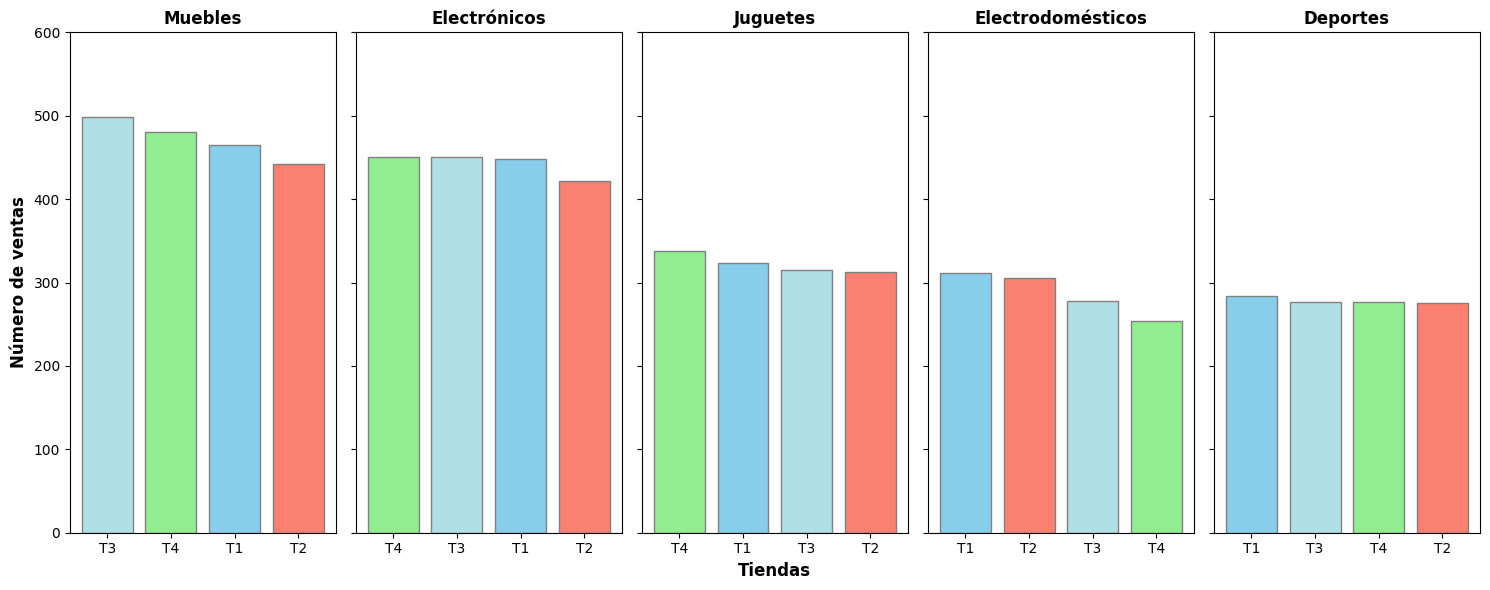



> Fig.2: Top 5 de categorías más vendidas en las tiendas.



Cabe mencionar los precios promedios de las categorías, siendo electrodomésticos el rubro con el precio más alto seguido de electrónicos. En último lugar, quedan juguetes y libros.



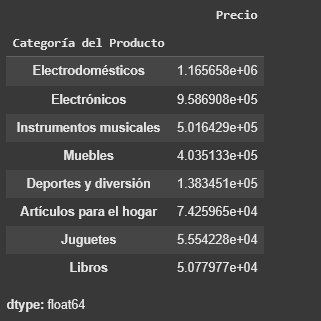

###**Análisis de productos más y menos vendidos**

A partir del análisis de categorías más vendidas se obtuvo que la tienda 1 destaca en las categorías electrodomésticos y electrónicos. Por lo cuál, en el gráfico 3.1 podemos ver que los productos más vendidos corresponden a esas dos categorías. No obstante, a pesar de estar en el tercer lugar en número de ventas en muebles, tambíen se encuentran entre los productos más vendidos muebles.

Entre los menos vendidos encontramos productos que pertenecen a las categorías fuera del top 5, como libros y artículos para el hogar. Sin embargo, también aparecen productos de los rubros electrónicos y deporte y diversión.



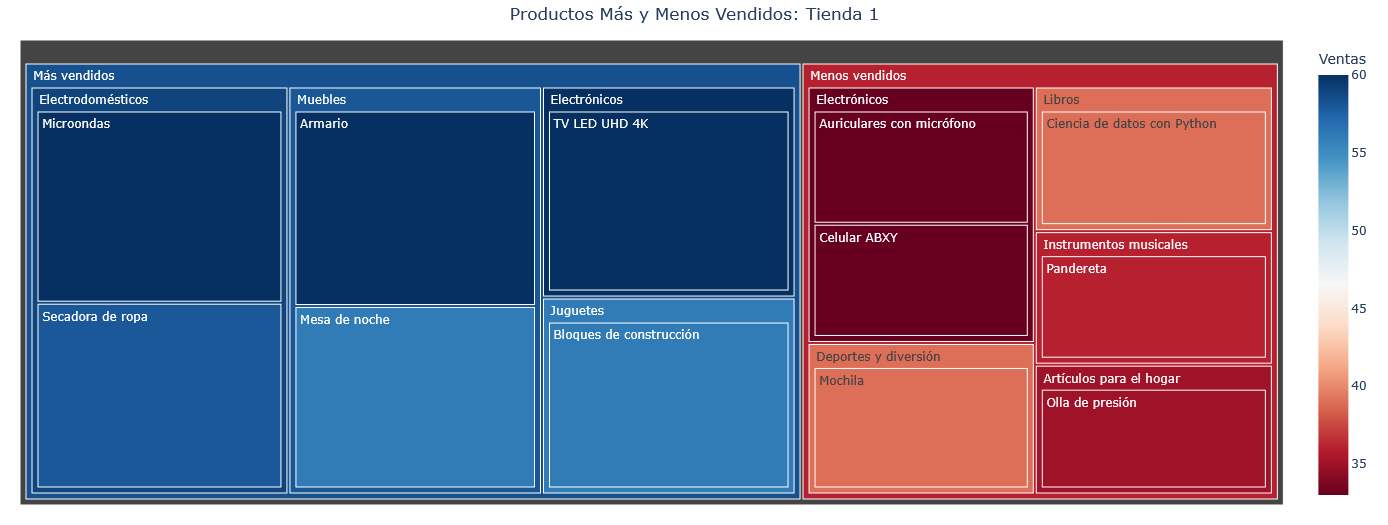

> Fig. 3.1: Productos más y menos vendidos de la tienda 1.

La tienda 2 en el gráfico de categorías populares no se destacaba en ninguna de los 5 rubros. No obstante, en la figura 3.2 podemos ver que entre sus productos más vendidos se encuentran productos de la categoría instrumentos músicales, electrodomésticos y libros. Dos categorías fuera del top 5 de rubro.

Entre los artículos menos vendidos encontramos  electrónicos, juguetes y muebles.

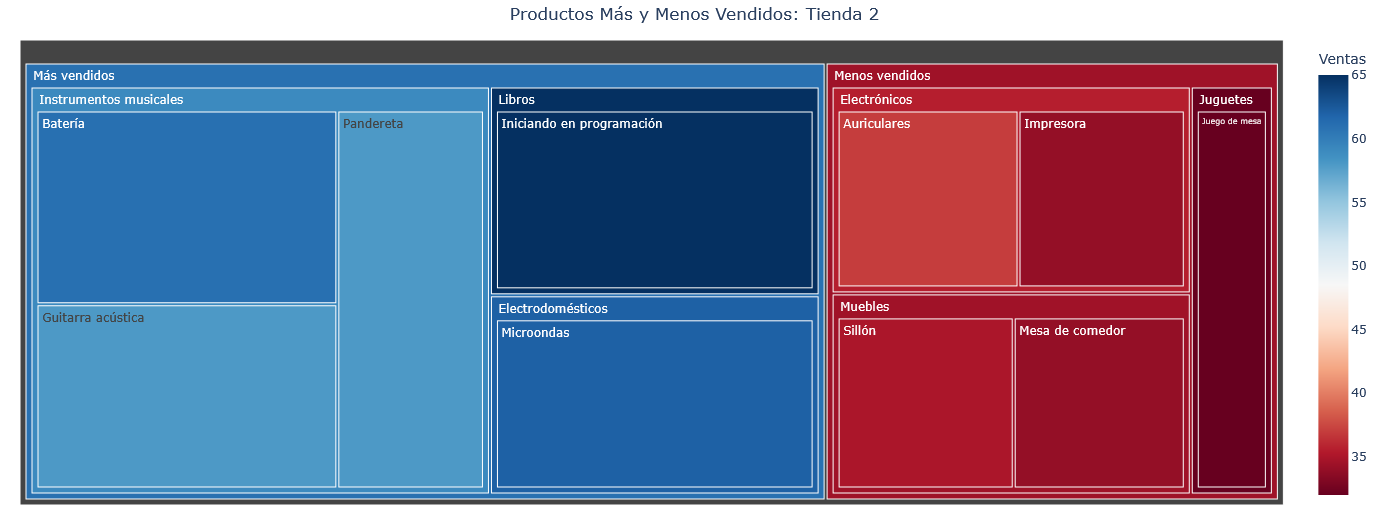

> Fig. 3.2: Productos más y menos vendidos de la tienda 2.



La tienda 3 se destaca por ser líder en la ventas de muebles y electrónicos, por lo cual entre los productos más vendidos se encuentran muebles. No obstante, contrario a lo esperado, el rubro artículos para el hogar con el producto set de ollas se cuela entre los más vendidos de la tienda 3 desplazando a productos electrónicos.

En los productos menos vendidos, se encuentran juguetes, electrodomésticos, artículos del hogar, instrumentos musicales y deportes y diversión.

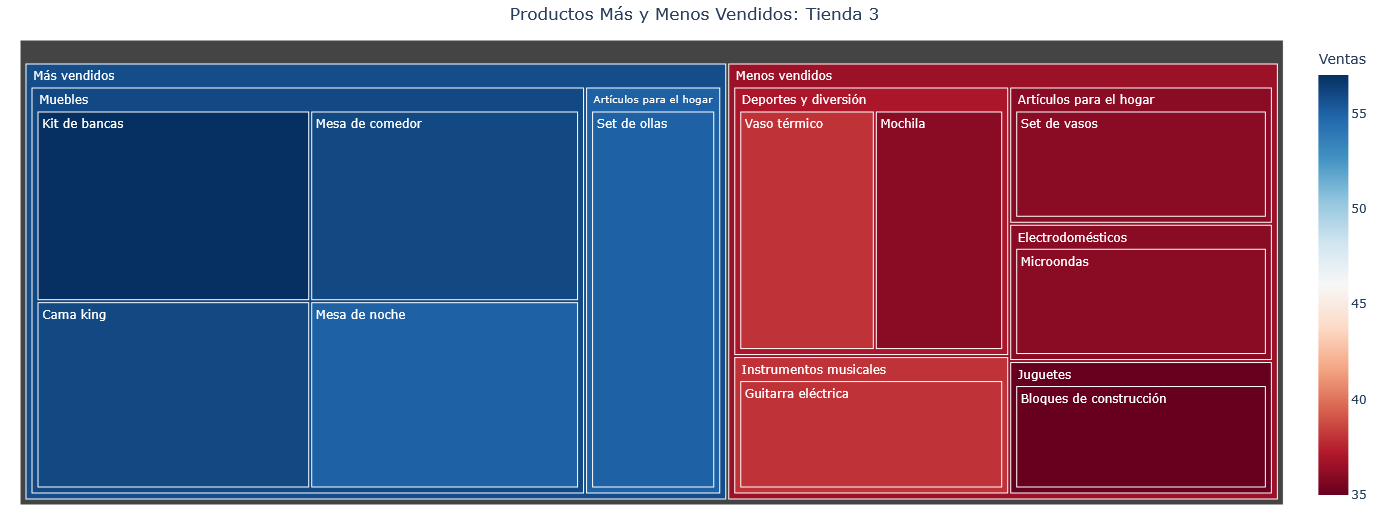

> Fig. 3.3: Productos más y menos vendidos de la tienda 3.

En la tienda 4 resaltan la venta de los productos de la categoría muebles, electrónicos y juguetes, siendo líder de ventas en esta última. Si observamos en la figura 3.4, vemos que entre sus artículos más vendidos se encuentran muebles y juguetes. Sin embargo, también aparecen productos de las categorías artículos para el hogar y libros. Además, hay que destacar que los muebles que más venden son los mismos que más vende la tienda 3.

Por otra parte, como lo sugiere el gráfico 2, los artículos que venden menos la tienda 4 son electrodomésticos. También, encontramos artículos pertenecientes a las categorías menos populares como libros e instrumentos musicales. Aunque, notablemente, figura el artículo armario como uno de los menos vendidos.

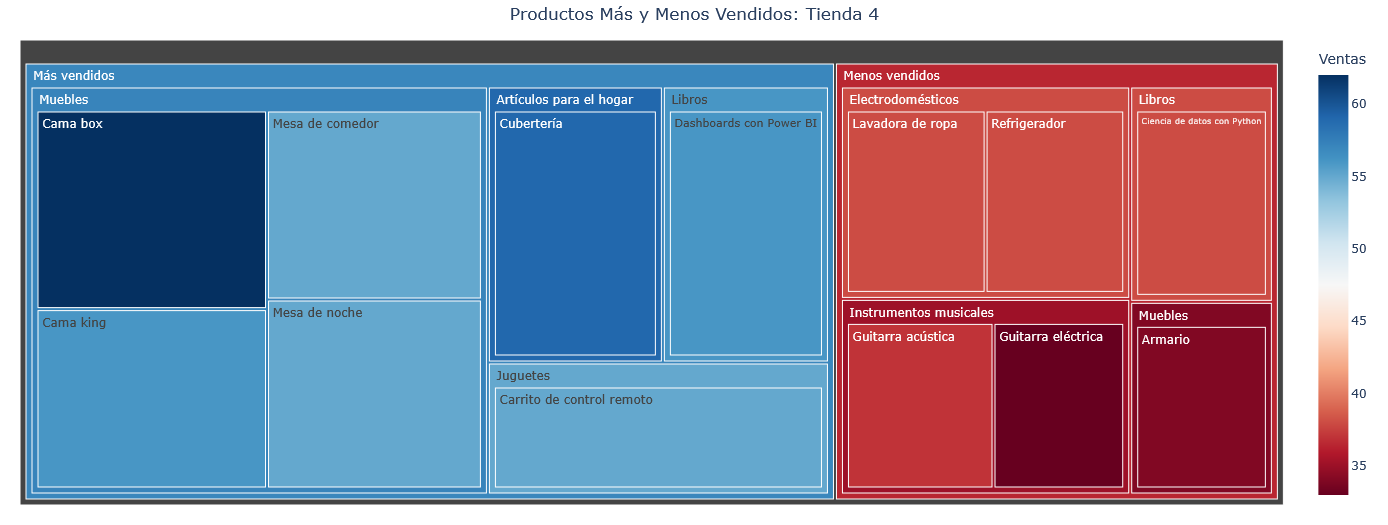

> Fig. 3.4: Productos más y menos vendidos de la tienda 4.

###**Análisis de calificación de los clientes y costo de envío**

Las cuatro tiendas tienen calificaciones cercana a 4 puntos, siendo la tienda 1 la que obtuvo una menor calificación y la tienda 3 la que tiene una mayor calificación(Fig 4.1).Por otra parte, el mayor costo de envío lo obtuvo la tienda 1 mientras que el menor costo de envío lo tuvo la tienda 4(Fig 4.2). La diferencia del costo de envío entre la tienda 1 y la tienda 4 es $2600.

Como se observa en la figura 4.2, no hay una relación entre estas dos variables, por lo cual, el costo de envío no tiene influencia en la calificación de los clientes.

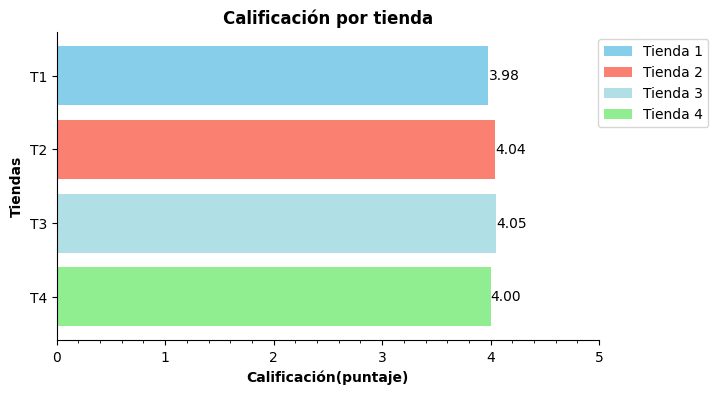
> Fig. 4.1: Calificación promedio de las tiendas.



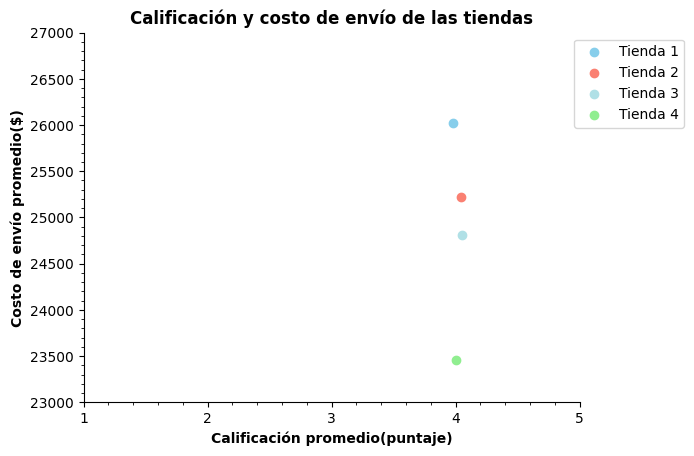

> Fig.4.2 Relación entre calificación promedio y costo de envío promedio.



##**Conclusión**

A partir del análisis de las variables facturación, categorías más vendidas, productos más y menos vendidos, calificación, costo de envío  se llega a la conclusión que se le recomienda al señor Juan vender la tienda 4. Las razones son las siguientes:
- La tienda 4 fue la que menos facturación obtuvo.
- La tienda 4 vende artículos con menor precio como muebles y juguetes.
- La tienda 4 vende productos similares a la tienda 3, por lo cual puede haber una superposición entre estas dos tiendas.
- La calificación de la tienda 4 es similar a la calificación de las otras tiendas.
- La diferencia del costo de envío entre la tienda 4 y la tienda 1 es de alrededor $2600, por lo cual esta diferencia puede ser compensada para que el costo de la tienda 1 sea similar a las de las otras tiendas.